## 全体の流れ
<ol>
<li>株価データを読み込む</li>
<li>データの全体像をつかむ</li>
<li>特徴量を追加する</li>
<li>学習データと検証データに分割する</li>
<li>データを整える</li>
<li>予測モデルの作成と交差検証</li>
<li>検証データによる予測と精度検証</li>
<li>データ取得期間</li>
    ＊前４年間
<li>計測期間</li>
    ＊20日
<li>基準化の仕方　最も低いところ</li>
    ＊最も低いところ
    ＊最初
    ＊全てやればいい
<li>予測方法</li>
    ＊月次リターンが前月リターンより上昇下落
    ＊平均の騰落率の上昇下落
</ol>

## 株価データを読み込み目的変数を追加する

In [2]:
import pandas as pd
#from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
#import datetime
#from dtw import dtw
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
#from dateutil.relativedelta import relativedelta
#from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("/Users/reiya/Downloads/2012-2020.csv")

In [38]:
#訓練データ
df_train=df[:953]
#検証データ
df_test=df[953:]


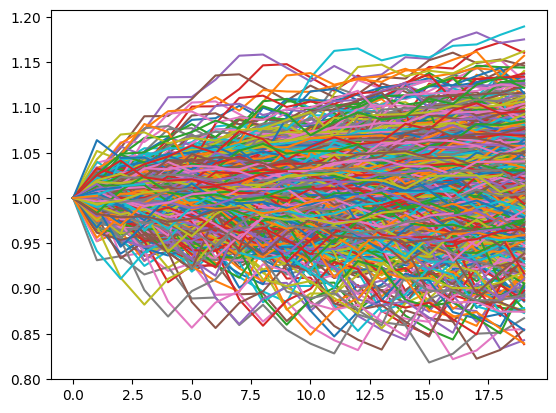

In [45]:
#データ整形
data=[]
df_train_close=[]
df_train_index=[]
for i in range(953):
    data.append(df_train[i:i+20])#20日ごとに分割
    df_train_close.append(data[i]["Close"])
    s=df_train_close[i][i]
    a=df_train_close[i]/s
    df_train_index.append(a.values)
    plt.plot(df_train_index[i])

In [46]:
df_train_index=pd.DataFrame(df_train_index)
df_train_index

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.990969,0.981978,0.985114,0.987187,0.978681,0.988708,0.984576,0.989219,0.996891,1.016797,1.018574,1.019395,1.032854,1.029099,1.024415,1.018870,1.016528,1.020148,1.026191
1,1.0,0.990927,0.994092,0.996183,0.987600,0.997718,0.993549,0.998234,1.005976,1.026063,1.027856,1.028685,1.042267,1.038477,1.033751,1.028155,1.025792,1.029445,1.035544,1.033153
2,1.0,1.003194,1.005304,0.996642,1.006853,1.002645,1.007374,1.015186,1.035458,1.037267,1.038103,1.051809,1.047985,1.043216,1.037569,1.035184,1.038871,1.045025,1.042612,1.055167
3,1.0,1.002104,0.993469,1.003648,0.999454,1.004167,1.011955,1.032162,1.033965,1.034798,1.048461,1.044649,1.039895,1.034266,1.031888,1.035564,1.041698,1.039293,1.051808,1.055798
4,1.0,0.991383,1.001541,0.997355,1.002059,1.009830,1.029994,1.031794,1.032626,1.046260,1.042456,1.037711,1.032094,1.029722,1.033389,1.039511,1.037111,1.049600,1.053581,1.066629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1.0,0.993492,0.997144,1.006384,1.008933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
949,1.0,1.003675,1.012976,1.015542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,1.0,1.009266,1.011823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
951,1.0,1.002533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
distance=[]
path=[]
for i in range(len(data_index)):
    print(len(data_index)-i)
    for j in range(len(data_index)):
        dist,pa=fastdtw(data_index[i], data_index[j])
        distance.append(dist)
        path.append(pa)
#listの分割　
def split_list(l, n):
    """
    リストをサブリストに分割する
    :param l: リスト
    :param n: サブリストの要素数
    :return: 
    """
    for i in range(0, len(l), n):
        yield l[i:i + n]
 
result = list(split_list(distance, len(data_index)))
#DTW行列
c=np.array(result)
#df_c=pd.DataFrame(c)
#df_c.to_csv("train_data.csv",encoding="shift_jis")


219
218
217
216
215
214
213
212
211
210
209
208
207
206
205
204
203
202
201
200
199
198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [134]:
#k-medoids法
kmedoid=KMedoids(n_clusters=30, metric='euclidean', method='alternate', init='heuristic', max_iter=300, random_state=None).fit(c)
#cluster追加
df_topix_train["cluster"]=kmedoid.labels_

ModuleNotFoundError: No module named 'sklearn_extras.cluster'

In [ ]:
data_index=[]
for i in range(len(data_Close)):
    first=data_Close[i][0]
    for j in range(len(data_Close[i])):
        #datas[i]["Close_index"]=datas[i]["Close"]
        data_index.append(data_Close[i][j]/ first)

: 

In [ ]:
a=split_list(data_index,20)
a

: 

In [ ]:
a

: 

In [ ]:
for i in range(len(datas)):
    plt.plot((datas[i]["Close_index"]))

: 

In [ ]:
data[1]

: 

In [ ]:
monthly_data["Adj Close_index"]

: 

In [ ]:
train_data=data[:216]
test_data=data[216:]

: 

In [ ]:
#DTW計算
distance=[]
path=[]
#dists = np.zeros((len(topix_train), len(topix_train)))
#for i in range(len(topix_train)):
    #for j in range(len(topix_train)):
        #dists[i, j] = fastdtw(topix_train[i], topix_train[j])[0]

for i in range(len(train_data)):
    print(len(train_data)-i)
    for j in range(len(train_data)):
        dist,pa=fastdtw(train_data[i], train_data[j])
        distance.append(dist)
        path.append(pa)

: 

In [ ]:
df_train=pd.DataFrame(train_data)
df_test=pd.DataFrame(test_data)
df_train["Adj Close"]=monthly_data["Adj Close"][:216]
df_test["Adj Close"]=monthly_data["Adj Close"][216:]

: 

In [ ]:
#listの分割　
def split_list(l, n):
    """
    #リストをサブリストに分割する
    #:param l: リスト
    #:param n: サブリストの要素数
    #:return: 
    """
    for i in range(0, len(l), n):
        yield l[i:i + n]
 
result = list(split_list(distance, len(train_data)))
#DTW行列
c=np.array(result)
#df_c=pd.DataFrame(c)
#df_c.to_csv("train_data.csv",encoding="shift_jis")
#k-medoids法
from sklearn_extra.cluster import KMedoids


: 

In [ ]:
kmedoid=KMedoids(n_clusters=30, metric='euclidean', method='pam', init='heuristic', max_iter=300, random_state=None).fit(c)
#cluster追加
df_train["cluster"]=kmedoid.labels_
df_train.groupby('cluster').count().iloc[:,0]

: 

In [ ]:
#月末価格
df_train["Month_Close"]=df_train["Adj Close"]
for i in range(len(df_train)):
    df_train["Month_Close"][i] = df_train["Adj Close"][i][-1]

#上昇下落ラベル付与
df_train["Up"]=df_train["cluster"]
for i in range(len(df_train)-1):
    if df_train["Month_Close"][i]<df_train["Month_Close"][i+1]:
        df_train["Up"][i]="up"
    else:
        df_train["Up"][i]="down"
#最後は個別で
if df_test["Adj Close"][0][-1]>df_train["Month_Close"][-1]:
    df_train["Up"][-1]="up"
else:
    df_train["Up"][-1]="down"


: 

In [ ]:
df_train

: 

<h1>検証フェーズ</h1>

In [ ]:
df_test

: 

In [ ]:
test_distance=[]
test_path=[]
#DTW
for i in range(len(test_data)):#テストデータ数分繰り返す 2016-01-01から2020-12-01までの60ヵ月分
    #topix_test.append(test_MinMax_close[i])#学習データに追加
    print(len(test_data)-i)
    for j in range(len(train_data)):#データ数分繰り返す1038
        test_dist,test_pa=fastdtw(test_data[i], train_data[j])
        test_distance.append(test_dist)
        test_path.append(test_pa)
test_result = list(split_list(test_distance,len(train_data)))

: 

In [ ]:
train_data

: 

In [ ]:
test_distance=[]
test_path=[]
#DTW
for i in range(len(test_data)):#120
    print(len(test_data)-i)
    for j in range(len(train_data)):#216.217.218...
        test_dist,test_pa=fastdtw(test_data[i], train_data[j])
        test_distance.append(test_dist)
        test_path.append(test_pa)
    # リストの要素を持つDataFrameを作成
    train_df = pd.DataFrame({'data': train_data.values.tolist()}, index=train_data.index)
    train_df
    # 新しいデータを追加
    new_df = pd.DataFrame({'data': test_data.tolist()}, index=test_data.index)
    train_df = pd.concat([train_df, new_df["data"]], axis=1)

    # DataFrameをSeriesに変換
    df_train = pd.Series(train_df['data'].values.tolist(), index=train_df.index)

: 

In [ ]:
df_train

: 

In [ ]:
# リストの要素を持つDataFrameを作成
train_df = pd.DataFrame({'data': train_data.values.tolist()}, index=train_data.index)
train_df
# 新しいデータを追加
new_df = pd.DataFrame({'data': test_data.tolist()}, index=test_data.index)
train_df = pd.concat([train_df, new_df], axis=0)

# DataFrameをSeriesに変換
df_train = pd.Series(train_df['data'].values.tolist(), index=train_df.index)

: 

In [ ]:
test_result = list(split_list(test_distance,len(train_data)))
#DTW行列
test_c=np.array(test_result)
#df_c=pd.DataFrame(c,index=datas,columns=datas)
#df_c.to_csv("dtw.csv",encoding="shift_jis")


#距離に基づき過去の株価変動パターンが近い月を順にn個選ぶ→クラスタリング,勾配降下法,動的計画法
#k-medoids法 
test_kmedoid=KMedoids(n_clusters=30, 
                       metric='euclidean', 
                       method='alternate', 
                       init='heuristic', 
                       max_iter=300, 
                       random_state=None).fit(test_c)
#cluster追加
df_test["cluster"]=test_kmedoid.labels_
#df_test_MinMax_close.groupby('cluster').count().iloc[:,1]

: 

In [ ]:
df_test

: 

In [ ]:
#月末価格
df_test["Month_Close"]=df_test["Adj Close"]
for i in range(len(df_test)):
    df_test["Month_Close"][i] = df_test["Adj Close"][i][-1]

#上昇下落ラベル付与
df_test["Up"]=df_test["cluster"]
for i in range(len(df_test)-1):
    if df_test["Month_Close"][i]<df_test["Month_Close"][i+1]:
        df_test["Up"][i]="up"
    else:
        df_test["Up"][i]="down"
#最後は個別で
if df_test["Adj Close"][0][-1]>df_test["Month_Close"][-1]:
    df_test["Up"][-1]="up"
else:
    df_test["Up"][-1]="down"


: 

In [ ]:
df_test

: 

: 

In [ ]:

df_test["Pred_Up"]=df_test["Up"]
touti=1

#正解ラベルの付与
    for j in range(30):#クラスタ数回
        if df_test_MinMax_close["cluster"][i]==j:#クラスタ数の特定
        #クラスタ内の上昇（下落）ラベルの多数決
            n=df_topix_tests[df_topix_tests["cluster"]==j]
            n.reset_index(inplace=True)
            n["Time"] = pd.to_datetime(n["index"])
            up=int((n['Up']=="up").sum())#上昇ラベルの総数
            down=int((n["Up"]=="down").sum())#下落ラベルの総数
    if up-down>=touti:#上昇ラベルの方が多い場合
        #df_test_MinMax_close["pred_Up"]=df_test_MinMax_close["cluster"]
        df_test_MinMax_close["pred_Up"][i]="up"
        position=df_test_MinMax_close["month_close"][i]#月末価格で購入
        #m_date=(n["Time"][j]+relativedelta(months=+1)).strftime('%Y-%m-%d')
        #m_date=pd.to_datetime(m_date)
        #df_test_MinMax_close.reset_index(inplace=True)
        #df_test_MinMax_close["Time"] = pd.to_datetime(df_test_MinMax_close.index)
        #n.set_index("index", inplace = True)
        #df_test_MinMax_close["Time"][0]+relativedelta(months=+1)
        #df_train["month_close"][df_train["Time"] [0] +relativedelta(months=+1).fromtimestamp(ts)]
        rikaku=df_test_MinMax_close["month_close"][i+1]#翌月価格
        profit=rikaku-position#翌月価格で売った時の収益
        month_return=(rikaku/position)#リターン％
        return_graph.append(month_return)
        ruiseki_return=(ruiseki_return+month_return)#累積収益率
        print(ruiseki_return)
        #sum=sum+profit#利益の合計
        #print("利益=",sum)
    #s.append(sum)#毎月の利益
    elif up-down>=touti:
        #df_test_MinMax_close["pred_Up"]=df_test_MinMax_close["cluster"]
        df_test_MinMax_close["pred_Up"][i]="down"
        position=df_test_MinMax_close["month_close"][i]#月末価格で売却
        #df_test_MinMax_close["Time"] = pd.to_datetime(df_test_MinMax_close.index
        rikaku=df_test_MinMax_close["month_close"][i+1]#翌月価格
        profit=position-rikaku#翌月価格で買った時の収益
        month_return=(rikaku/position)#リターン％
        return_graph.append(month_return)
        ruiseki_return=(ruiseki_return+month_return)#累積収益率
        print(ruiseki_return)
    #ruiseki_return=(1+month_return).cumprod()#累積収益率
    #sum=sum+profit#利益の合計
    #print("利益=",sum)
#s.append(sum)

#結果
acc=0
bunbo=0
for i in range(60):
    if df_test_MinMax_close["pred_Up"][i]=="up" or df_test_MinMax_close["pred_Up"][i]=="down":
        bunbo=bunbo+1
        if df_test_MinMax_close["pred_Up"][i]==df_test_MinMax_close["Up"][i]:
            acc=acc+1
print("累積収益率：",100+ruiseki_return,"%")
print("正解率：",(acc/bunbo)*100,"%")

: 

In [ ]:
bunbo

: 

In [ ]:
acc=0
bunbo=0
for i in range(60):
    if df_test_MinMax_close["pred_Up"][i]=="up" or df_test_MinMax_close["pred_Up"][i]=="down":
        bunbo=bunbo+1
        if df_test_MinMax_close["pred_Up"][i]==df_test_MinMax_close["Up"][i]:
            acc=acc+1
print("累積収益率：",100+ruiseki_return,"%")
print("正解率：",(acc/bunbo)*100,"%")

: 

In [ ]:
plt.plot(return_graph)

: 

In [ ]:
#変動率
#テクニカル指標
#月、週、日単位の平均、標準偏差
#移動平均線のパターン分析
#トレンド・季節性・周期性・不規則性→不規則性を削除もしくは不規則性のトレンドのみに適用

: 

In [ ]:
# 終値の前日比の追加
df_shift = df.shift(1)

df['Close_ratio'] = (df['Close'] - df_shift['Close']) / df_shift['Close']
df

# 始値と終値の差分を追加
df['Body'] = df['Open'] - df['Close']
df

: 

## 検証データによる予測と精度検証

In [ ]:
#参考文献
k-medoids
#https://python-kmedoids.readthedocs.io/en/latest/

: 